<a href="https://colab.research.google.com/github/Sahar-DataScience/arabic-ocr/blob/main/Arabic_ocr_with_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/projet.zip -d /content/drive/MyDrive/project_test

Archive:  /content/drive/MyDrive/projet.zip
  inflating: /content/drive/MyDrive/project_test/image 1.jpg  
  inflating: /content/drive/MyDrive/project_test/image 2.webp  
  inflating: /content/drive/MyDrive/project_test/image 3.jpg  
  inflating: /content/drive/MyDrive/project_test/IMAGE 4.webp  
  inflating: /content/drive/MyDrive/project_test/IMAGE 5.webp  
  inflating: /content/drive/MyDrive/project_test/IMAGE 7.jpg  
  inflating: /content/drive/MyDrive/project_test/interview projet data scientist.docx  


In [ ]:
!pip install -q transformers

In [ ]:
!pip install arabert

#**installing pretrained models and processors compatible with arabic dialect**

In [ ]:
from transformers import TrOCRProcessor,VisionEncoderDecoderModel, AutoTokenizer, ViTFeatureExtractor, AutoModel

In [ ]:
from transformers import VisionEncoderDecoderModel
model = VisionEncoderDecoderModel.from_pretrained("gagan3012/TrOCR-Ar-Small")

pytorch_model.bin:   0%|          | 0.00/247M [00:00<?, ?B/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")
feature_extractor=ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-384")
processor = TrOCRProcessor(feature_extractor = feature_extractor, tokenizer = tokenizer)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/trocr/processing_trocr.py:45: FutureWarning: The `feature_extractor` argument is deprecated and will be removed in v5, use `image_processor` instead.
  warnings.warn(


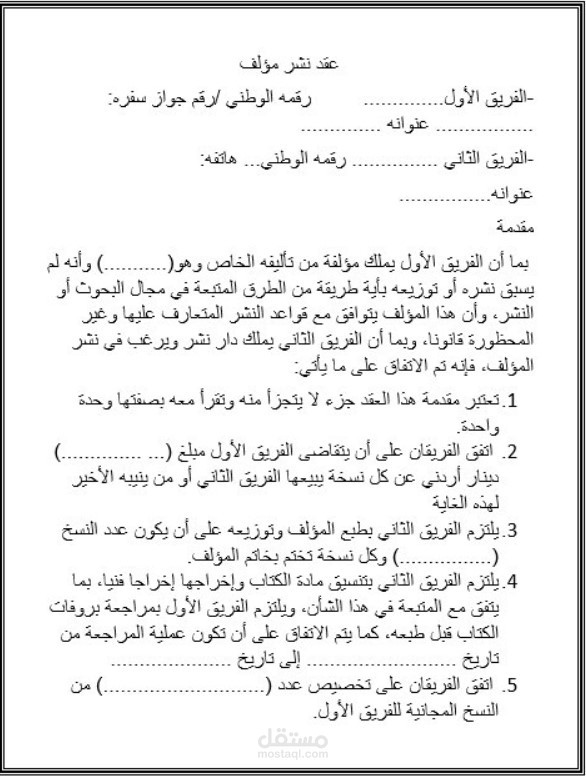

In [ ]:
import requests
from PIL import Image

img_path = "/content/drive/MyDrive/project_test/image 1.jpg"
url = "https://mostaql.hsoubcdn.com/uploads/portfolios/903783/635a9f7bc9f61/22.jpg"
#image = Image.open(img_path).convert("RGB").resize([384,384])
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
print(image.size)

(586, 776)


In [ ]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# calling the processor is equivalent to calling the feature extractor
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


torch.Size([1, 3, 384, 384])


In [ ]:
pixel_values

tensor([[[[ 0.0510,  0.0510,  0.0510,  ...,  0.0431, -0.0196,  0.5059],
          [-0.0824, -0.0824, -0.0745,  ...,  0.1137, -0.1529,  0.2078],
          [-0.8588, -0.6392, -0.5294,  ..., -0.2471, -0.0275,  0.1922],
          ...,
          [-0.9294, -0.5451, -0.3804,  ..., -0.3176, -0.0196,  0.1922],
          [-0.1922, -0.1922, -0.1922,  ...,  0.1216, -0.0588,  0.2078],
          [-0.0510, -0.0353, -0.0431,  ..., -0.0431, -0.2314,  0.3569]],

         [[ 0.0510,  0.0510,  0.0510,  ...,  0.0431, -0.0196,  0.5059],
          [-0.0824, -0.0824, -0.0745,  ...,  0.1137, -0.1529,  0.2078],
          [-0.8588, -0.6392, -0.5294,  ..., -0.2471, -0.0275,  0.1922],
          ...,
          [-0.9294, -0.5451, -0.3804,  ..., -0.3176, -0.0196,  0.1922],
          [-0.1922, -0.1922, -0.1922,  ...,  0.1216, -0.0588,  0.2078],
          [-0.0510, -0.0353, -0.0431,  ..., -0.0431, -0.2314,  0.3569]],

         [[ 0.0510,  0.0510,  0.0510,  ...,  0.0431, -0.0196,  0.5059],
          [-0.0824, -0.0824, -

In [ ]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

الشرّة
